In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import joblib, shap, mlflow

In [4]:
X, y = load_iris(return_X_y=True)
model = RandomForestClassifier().fit(X, y)
joblib.dump(model, '../models/model.pkl')

['../models/model.pkl']

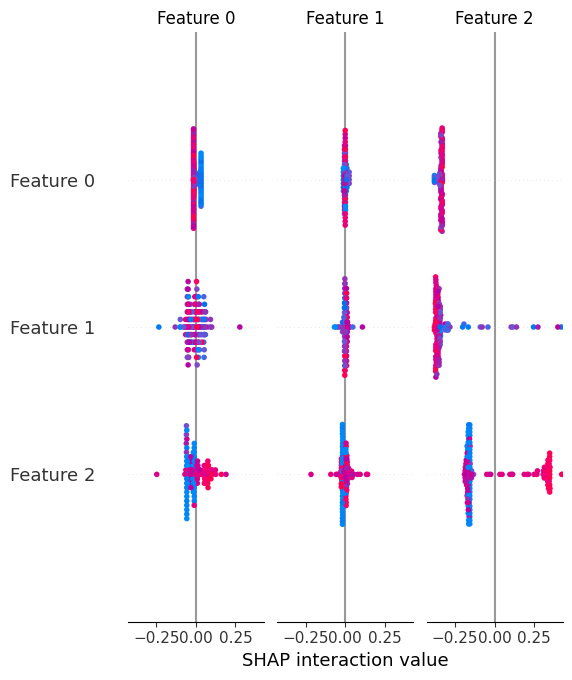

In [5]:
model = joblib.load('../models/model.pkl')
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot summary
shap.summary_plot(shap_values, X)


In [6]:
with mlflow.start_run():
    model = RandomForestClassifier()
    model.fit(X, y)

    mlflow.sklearn.log_model(model, "iris_model")
    mlflow.log_param("n_estimators", model.n_estimators)
    mlflow.log_metric("train_accuracy", model.score(X, y))

2025/07/02 00:00:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/02 00:01:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
